In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.__version__

'1.0.3'

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
path = os.path.abspath(os.path.join(os.getcwd(), 
                                    '../dataset_covid/data_gouv/donnees-hospitalieres-covid19-2020-03-25-16h10.csv'))
path = os.path.abspath(os.path.join(os.getcwd(), '../dataset_covid/data_gouv/donnees-hospitalieres-covid19-2020-03-26-13h32.csv'))
path = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/data_gouv/donnees-hospitalieres-covid19-2020-03-26-18h56.csv"))
df = pd.read_csv(path, sep=";")

In [7]:
df.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [8]:
rhin = df[df["dep"]=="68"]

In [9]:
import datetime
dict_data = []
dict_data = df.to_dict()
my_data = {k: [dict_data[k][k1] for k1 in sorted(dict_data[k], key=lambda
x: float(x))] for k in dict_data}
my_data["date"] = [int(datetime.datetime.strptime(x, "%Y-%m-%d").timestamp()/(24*3600)) for x in my_data["jour"]]

In [10]:
indexes_per_department = {}
index_sex = {}
index_days = {}
for k in range(len(my_data["dep"])):
    dep = my_data["dep"][k]
    sex = my_data["sexe"][k]
    day = my_data["date"][k]
    if dep not in indexes_per_department:
        indexes_per_department[dep] = []
    indexes_per_department[dep] += [k]
    if sex not in index_sex:
        index_sex[sex] = []
    index_sex[sex] += [k]
    if day not in index_days:
        index_days[day] = []
    index_days[day] += [k]

In [11]:
datas = ["hosp", "rea", "rad", "dc", 'date']
import numpy as np
for d in datas:
    my_data[d+"_np"] = np.array(my_data[d])

In [12]:
for department in indexes_per_department:
    # departement_of_interest = '68'
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_sex[sex]]
    fig, ax = plt.subplots(1, figsize=(6, 6))
    for data_of_interest in ["rea", "dc", "hosp", "rad"]:
        ax.plot(my_data["date_np"][indexes], my_data[data_of_interest+"_np"][indexes], label=data_of_interest)
        print(data_of_interest, my_data[data_of_interest+"_np"][indexes])
    ax.set_xlabel('date')
    ax.set_ylabel('nb people')
    ax.set_title("Evolution of people in rea/hospital/healed/deceased in departement : "+str(department))
    ax.legend()
    fig.savefig("../images_mess/"+department+"_hospital.png")
    #ax.set_yscale('log')
    #plt.show()

rea [0 0 0 0 1 3 3 6 6]
dc [0 0 0 0 0 0 0 0 2]
hosp [ 2  2  2  4  8 17 22 29 33]
rad [ 1  1  1  1  2  7 11 15 17]
rea [10 15 19 20 21 23 27 32 35]
dc [11 19 24 25 28 30 33 34 36]
hosp [ 41  43  52  61  69  91 107 115 124]
rad [ 18  33  40  49  55  62  85  92 102]
rea [0 0 0 0 0 0 0 0 1]
dc [0 0 0 0 0 1 1 1 2]
hosp [ 4  0  1  5  5  9  9 12 15]
rad [ 1  7 10 10 10 16 16 20 26]
rea [1 1 1 1 1 1 1 1 1]
dc [0 0 0 0 0 0 0 0 0]
hosp [3 3 3 4 4 4 4 8 9]
rad [ 2  3  3  3  3  3  3 16 16]
rea [1 1 1 1 1 3 4 4 6]
dc [0 0 0 0 0 0 1 1 1]
hosp [ 8 10 13 13 14 19 19 23 29]
rad [ 9 10 10 10 11 13 16 19 20]
rea [ 1  5  7  7  8 13 12 17 18]
dc [ 2  2  4  6  7  8  8  9 12]
hosp [25 33 43 46 45 66 55 75 85]
rad [47 48 61 61 63 63 86 93 95]
rea [1 2 3 3 3 3 4 5 7]
dc [0 0 1 1 1 2 3 4 5]
hosp [12 11 15 15 22 29 37 48 52]
rad [ 0  0  3  3  3  3  1 34 39]
rea [0 0 1 1 1 3 3 3 7]
dc [0 0 0 0 0 0 0 0 0]
hosp [ 0  0  1  3  4  6  5  5 13]
rad [1 1 1 1 1 1 2 2 2]
rea [1 1 1 1 1 3 3 3 3]
dc [0 0 0 0 0 0 0 0 0]
hosp 

TypeError: can only concatenate str (not "float") to str

In [13]:
datas = ["hosp", "rea", "rad", "dc"]
aggregated_data = {}
sex = 0
for d in datas:
    aggregated_data[d] = np.array([np.sum(my_data[d+"_np"][[p for p in index_days[k] if p in index_sex[0]]]) for k in                                       sorted(index_days)])
    print(d, aggregated_data[d])
for d in datas:
    aggregated_data["ratio_"+d] = (aggregated_data[d][1:]-aggregated_data[d][:-1])/aggregated_data[d][:-1]
    print("growth ratio", d,  aggregated_data["ratio_"+d])
for d in datas:
    aggregated_data["gratio_"+d] = (aggregated_data[d][2:]-aggregated_data[d][1:-1])/(
                                    aggregated_data[d][1:-1]-aggregated_data[d][:-2])
    print("ratio delta_n+1/delta_n", d,  aggregated_data["gratio_"+d])



hosp [ 2972  4073  5226  5900  6954  8673 10176 12072 13879]
rea [ 771 1002 1297 1453 1674 2080 2516 2935 3351]
rad [ 816 1180 1587 1811 2117 2567 3281 4085 4947]
dc [ 218  327  450  525  632  860 1100 1388 1696]
growth ratio hosp [0.3704576  0.28308372 0.12897053 0.17864407 0.24719586 0.17329644
 0.18632075 0.14968522]
growth ratio rea [0.29961089 0.29441118 0.12027756 0.15209911 0.24253286 0.20961538
 0.16653418 0.14173765]
growth ratio rad [0.44607843 0.34491525 0.14114682 0.16896742 0.21256495 0.2781457
 0.24504724 0.21101591]
growth ratio dc [0.5        0.37614679 0.16666667 0.20380952 0.36075949 0.27906977
 0.26181818 0.22190202]
ratio delta_n+1/delta_n hosp [1.04722979 0.58456201 1.56379822 1.63092979 0.87434555 1.26147705
 0.95305907]
ratio delta_n+1/delta_n rea [1.27705628 0.52881356 1.41666667 1.83710407 1.07389163 0.96100917
 0.9928401 ]
ratio delta_n+1/delta_n rad [1.11813187 0.55036855 1.36607143 1.47058824 1.58666667 1.12605042
 1.0721393 ]
ratio delta_n+1/delta_n dc [1.1

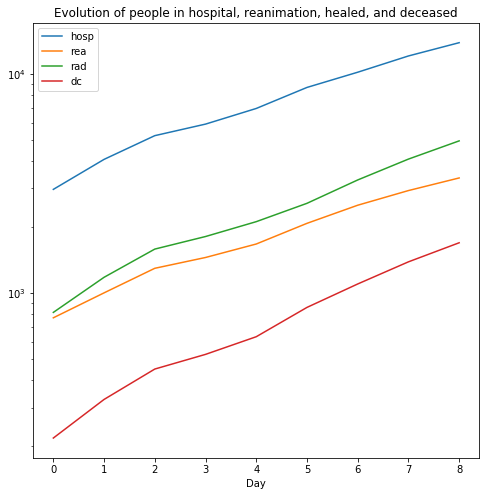

In [14]:
fig, ax = plt.subplots(1, figsize=(8,8))
for d in ["hosp", "rea", "rad", "dc"]:
    ax.plot(aggregated_data[d], label=d)
plt.legend()
ax.set_yscale('log')
ax.set_title("Evolution of people in hospital, reanimation, healed, and deceased")
ax.set_xlabel("Nb people")
ax.set_xlabel("Day")
plt.show()

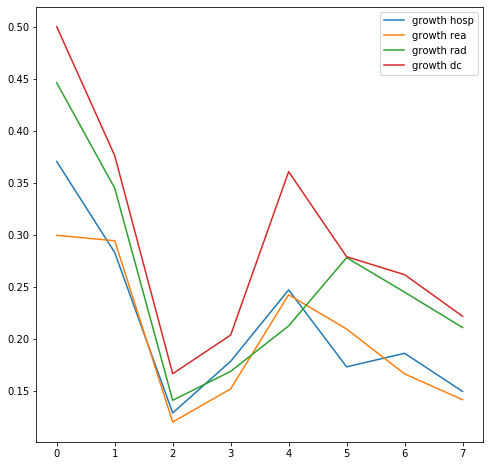

In [15]:
fig, ax = plt.subplots(1, figsize=(8,8))
for d in ["hosp", "rea", "rad", "dc"]:
    ax.plot(aggregated_data["ratio_"+d], label="growth " + d)
plt.legend()
#ax.set_yscale('log')
plt.show()

In [16]:
path_rean_file = os.path.abspath(os.path.join(os.getcwd(), "../dataset_covid/rea.csv"))
df_rea = pd.read_csv(path_rean_file, sep=";")

In [17]:
print(df_rea.head())

Num                      Nom  rea  total-bed-per-10000  population  \
0   1                      Ain   22                  5.0      656955   
1   2                    Aisne   34                  8.9      526050   
2   3                   Allier   24                 10.2      331315   
3   4  Alpes-de-Haute-Provence    6                 13.7      165197   
4   5             Hautes-Alpes    8                 13.9      141756   

   total-bed  
0  328.47750  
1  468.18450  
2  337.94130  
3  226.31989  
4  197.04084  


In [18]:
dep = df_rea.Nom.values
num_dep = df_rea.Num.values
rea = df_rea.rea.values
map_dep_num_to_rea = {num_dep[i]: rea[i] for i in range(num_dep.shape[0])}

In [19]:
print(map_dep_num_to_rea.keys())
print(indexes_per_department.keys())

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973', '974', '976'])
dict_keys(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62

In [21]:
for department in indexes_per_department:
    # departement_of_interest = '68'
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_sex[sex]]
    fig, ax = plt.subplots(1, figsize=(8, 8))
    for data_of_interest in ["rea", "dc", "hosp", "rad"]:
        ax.plot(my_data["date_np"][indexes], 
                my_data[data_of_interest+"_np"][indexes], 
                label=data_of_interest)
        dep = department
        try:
            if dep not in map_dep_num_to_rea:
                dep = dep[1:]
            ax.axhline(y=map_dep_num_to_rea[dep], linestyle="--")
        except:
            pass
        print(data_of_interest, my_data[data_of_interest+"_np"][indexes])
    ax.set_xlabel('date')
    ax.set_ylabel('nb people')
    ax.legend()
    ax.set_title("Evolution of people in rea/hospital/healed/deceased in departement : "+str(department))           
    fig.savefig("../images_mess/"+department+"_hospital_withlimits.png")
    #ax.set_yscaos.path.join(os.getcwd(), le('log')
    #plt.show()_withlimits)
    plt.close('all')

rea [0 0 0 0 1 3 3 6 6]
dc [0 0 0 0 0 0 0 0 2]
hosp [ 2  2  2  4  8 17 22 29 33]
rad [ 1  1  1  1  2  7 11 15 17]
rea [10 15 19 20 21 23 27 32 35]
dc [11 19 24 25 28 30 33 34 36]
hosp [ 41  43  52  61  69  91 107 115 124]
rad [ 18  33  40  49  55  62  85  92 102]
rea [0 0 0 0 0 0 0 0 1]
dc [0 0 0 0 0 1 1 1 2]
hosp [ 4  0  1  5  5  9  9 12 15]
rad [ 1  7 10 10 10 16 16 20 26]
rea [1 1 1 1 1 1 1 1 1]
dc [0 0 0 0 0 0 0 0 0]
hosp [3 3 3 4 4 4 4 8 9]
rad [ 2  3  3  3  3  3  3 16 16]
rea [1 1 1 1 1 3 4 4 6]
dc [0 0 0 0 0 0 1 1 1]
hosp [ 8 10 13 13 14 19 19 23 29]
rad [ 9 10 10 10 11 13 16 19 20]
rea [ 1  5  7  7  8 13 12 17 18]
dc [ 2  2  4  6  7  8  8  9 12]
hosp [25 33 43 46 45 66 55 75 85]
rad [47 48 61 61 63 63 86 93 95]
rea [1 2 3 3 3 3 4 5 7]
dc [0 0 1 1 1 2 3 4 5]
hosp [12 11 15 15 22 29 37 48 52]
rad [ 0  0  3  3  3  3  1 34 39]
rea [0 0 1 1 1 3 3 3 7]
dc [0 0 0 0 0 0 0 0 0]
hosp [ 0  0  1  3  4  6  5  5 13]
rad [1 1 1 1 1 1 2 2 2]
rea [1 1 1 1 1 3 3 3 3]
dc [0 0 0 0 0 0 0 0 0]
hosp 

TypeError: can only concatenate str (not "float") to str

[datetime.datetime(2020, 3, 17, 1, 0), datetime.datetime(2020, 3, 18, 1, 0), datetime.datetime(2020, 3, 19, 1, 0), datetime.datetime(2020, 3, 20, 1, 0), datetime.datetime(2020, 3, 21, 1, 0), datetime.datetime(2020, 3, 22, 1, 0), datetime.datetime(2020, 3, 23, 1, 0), datetime.datetime(2020, 3, 24, 1, 0), datetime.datetime(2020, 3, 25, 1, 0)]


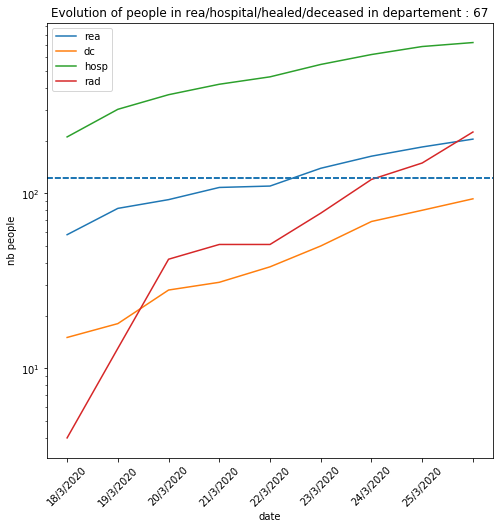

[datetime.datetime(2020, 3, 17, 1, 0), datetime.datetime(2020, 3, 18, 1, 0), datetime.datetime(2020, 3, 19, 1, 0), datetime.datetime(2020, 3, 20, 1, 0), datetime.datetime(2020, 3, 21, 1, 0), datetime.datetime(2020, 3, 22, 1, 0), datetime.datetime(2020, 3, 23, 1, 0), datetime.datetime(2020, 3, 24, 1, 0), datetime.datetime(2020, 3, 25, 1, 0)]


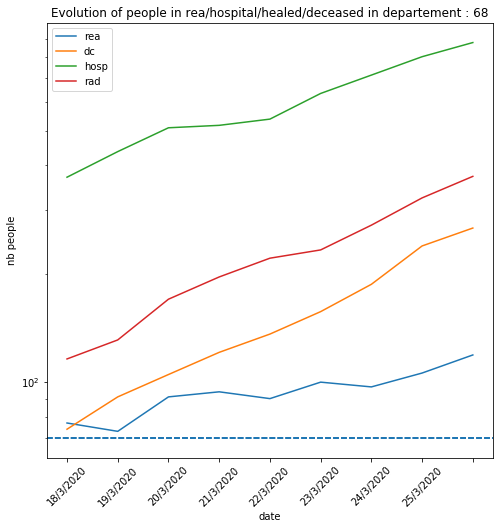

In [36]:
ile_de_france = ["75", "77", "78", "91", "92", "93", "94"]
alsace = ["67", "68"]
for department in alsace:
    # departement_of_interest = '68'
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_sex[sex]]
    fig, ax = plt.subplots(1, figsize=(8, 8))
    for data_of_interest in ["rea", "dc", "hosp", "rad"]:
        ax.plot(my_data["date_np"][indexes], 
                my_data[data_of_interest+"_np"][indexes], 
                label=data_of_interest)
        dep = department
        try:
            if dep not in map_dep_num_to_rea:
                dep = dep[1:]
            ax.axhline(y=map_dep_num_to_rea[dep], linestyle="--")
        except:
            pass
        #print(data_of_interest, my_data[data_of_interest+"_np"][indexes])
    ax.set_xlabel('date')
    ax.set_ylabel('nb people')
    ax.legend()
    dates = [datetime.datetime.fromtimestamp(my_data["date_np"][ind]*(24*3600)) for ind in indexes]
    print(dates)
    ax.set_xticklabels([str(date.day)+'/'+str(date.month)+"/2020" for date in dates])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax.set_title("Evolution of people in rea/hospital/healed/deceased in departement : "+str(department)) 
    ax.set_yscale('log')          
    fig.savefig("../images_/"+department+"_alsace_log_hospital_withlimits.png")
    plt.show()

In [37]:
data_rea_per_depart = {}
data_hosp_per_depart = {}
data_rad_per_depart = {}
data_dc_per_depart = {}


for department in indexes_per_department:
    sex = 0
    indexes = [i for i in indexes_per_department[department] if i in index_sex[sex]]
    data_rea_per_depart[department] = my_data["rea_np"][indexes]
    data_hosp_per_depart[department] = my_data["hosp_np"][indexes]
    data_rad_per_depart[department] = my_data["rad_np"][indexes]
    data_dc_per_depart[department] = my_data["dc_np"][indexes]

    for data_of_interest in ["rea", "dc", "hosp", "rad"]:
        ax.plot(my_data["date_np"][indexes], 
                my_data[data_of_interest+"_np"][indexes], 
                label=data_of_interest)
        dep = department
        try:
            if dep not in map_dep_num_to_rea:
                dep = dep[1:]
            map_dep_num_to_rea[department] = map_dep_num_to_rea[dep]
        except:
            pass

In [38]:
print(data_rea_per_depart["31"])
print(data_rad_per_depart["31"])
print(data_hosp_per_depart["31"])
print(data_dc_per_depart["31"])

[ 5  6 10 14 16 19 28 36 55]
[11 13 16 17 23 26 38 44 49]
[ 23  26  35  51  55  71  89 108 140]
[0 1 2 2 2 2 3 3 3]


In [39]:
load_per_depart = {dep: data_rea_per_depart[dep]/map_dep_num_to_rea[dep]
                   for dep in data_rea_per_depart if dep in map_dep_num_to_rea and map_dep_num_to_rea[dep]>0}
max_load_per_depart = {dep: np.max(load_per_depart[dep])
                       for dep in load_per_depart}

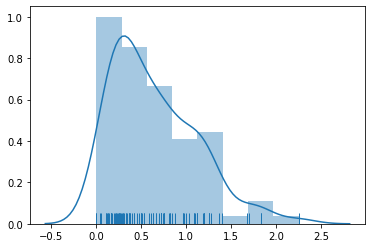

In [40]:
fig, ax = plt.subplots(1)
sns.distplot([max_load_per_depart[dep] 
              for dep in max_load_per_depart], 
              rug=True)

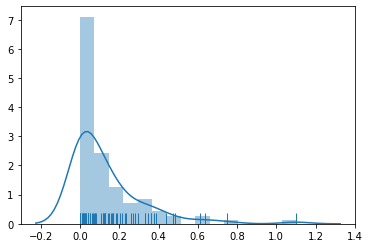

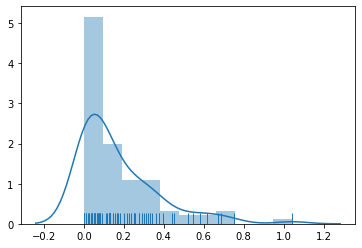

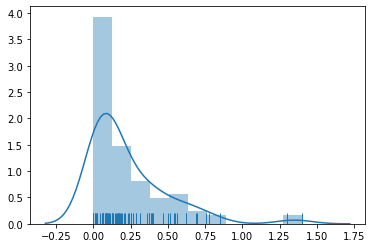

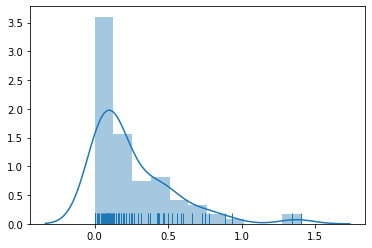

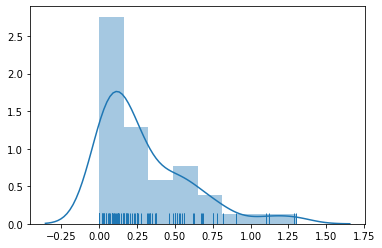

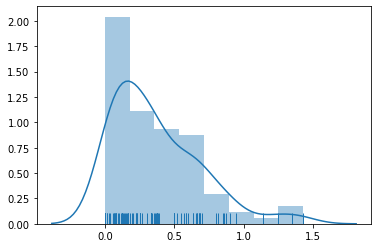

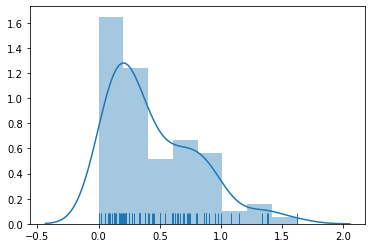

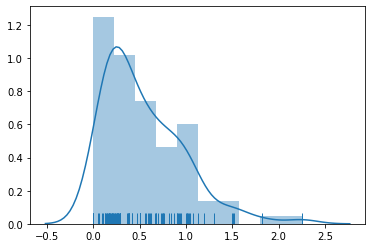

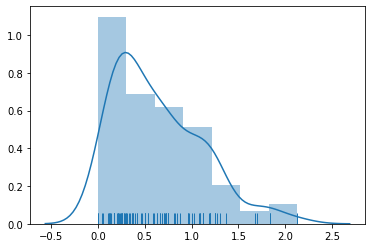

In [41]:
for i in range(9):
    fig, ax = plt.subplots(1)
    sns.distplot([load_per_depart[dep][i] 
                 for dep in max_load_per_depart], 
                 rug=True, ax=ax)
    fig.savefig("../images_mess/evolution_distrib_"+str(i)+".png")

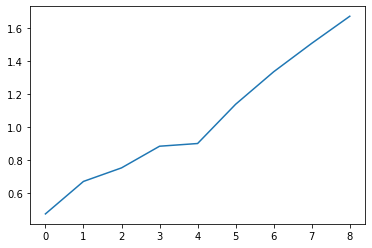

In [42]:
plt.plot(load_per_depart["67"])

In [43]:
from sklearn.linear_model import LinearRegression
interpolation_load = {dep: LinearRegression().fit([[i] for i in range(len(load_per_depart[dep]))],
                                                  load_per_depart[dep])
                                                  for dep in load_per_depart}

In [44]:
predictions = {dep: interpolation_load[dep].predict([[i] for i in range(30)]) for dep in interpolation_load}

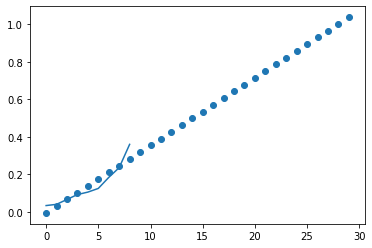

In [45]:
fig, ax = plt.subplots(1)
ax.plot(range(len(load_per_depart["31"])), load_per_depart["31"])
ax.scatter(range(len(predictions["31"])), predictions["31"])

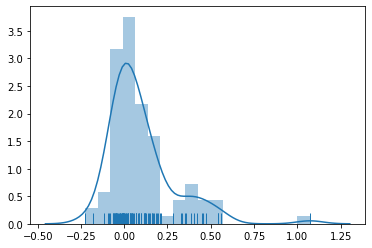

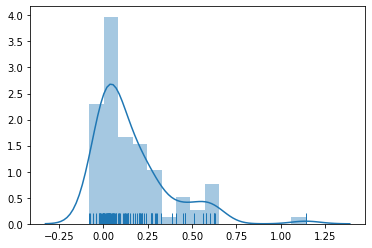

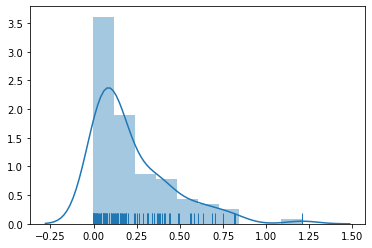

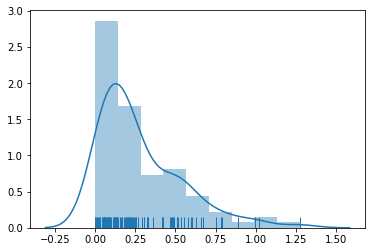

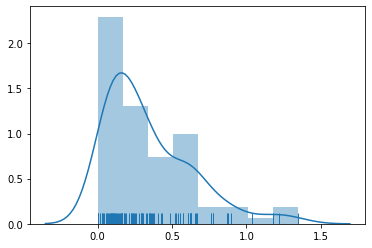

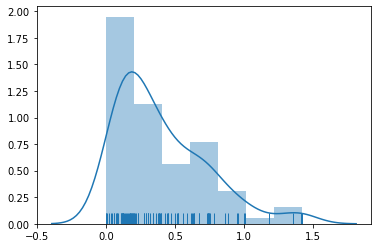

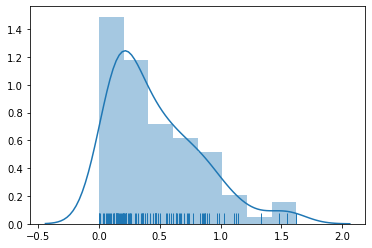

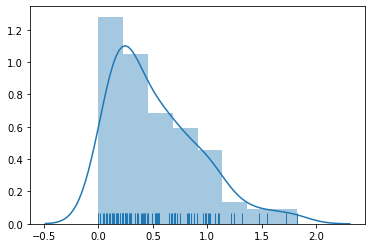

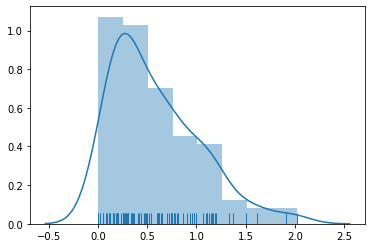

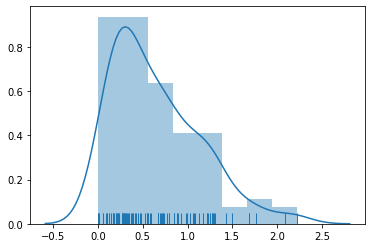

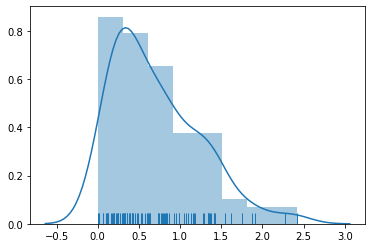

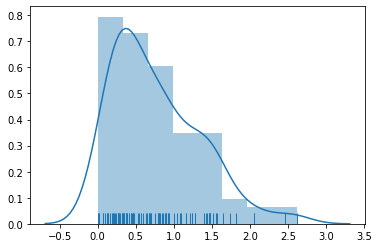

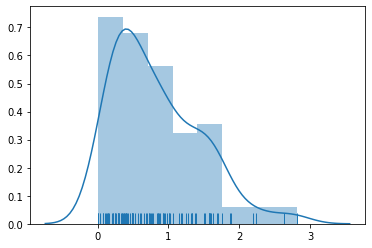

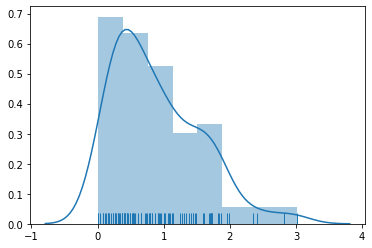

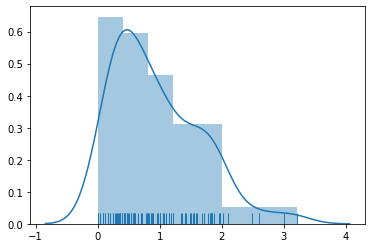

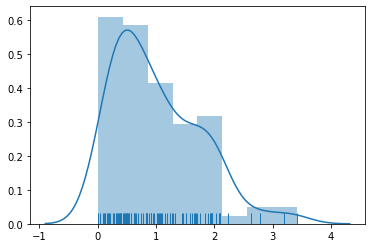

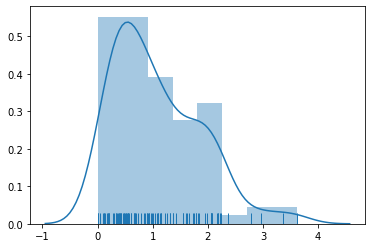

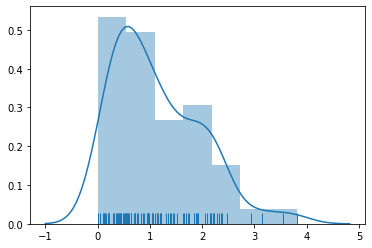

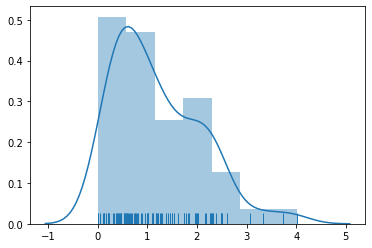

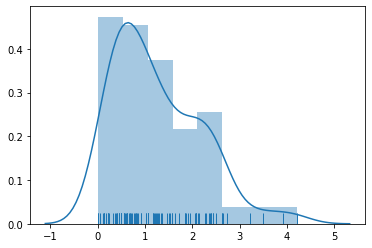

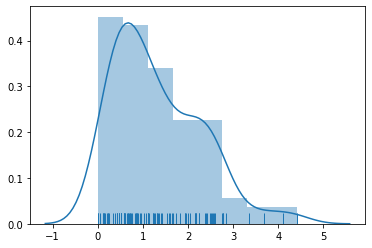

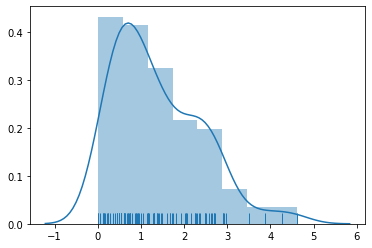

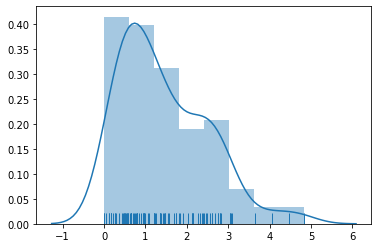

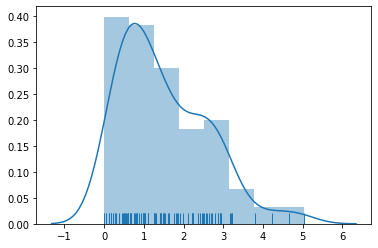

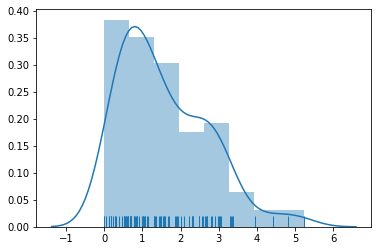

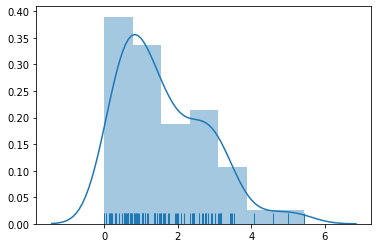

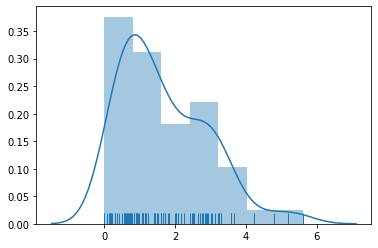

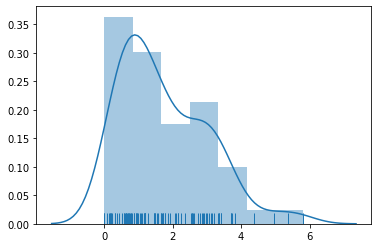

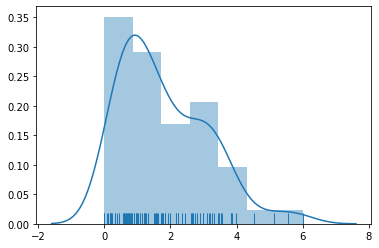

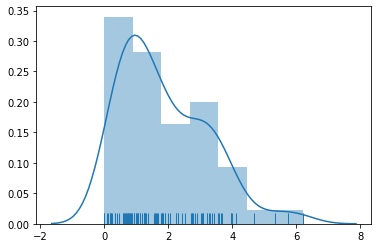

In [46]:
for i in range(len(predictions["31"])):
    fig, ax = plt.subplots(1)
    sns.distplot([predictions[dep][i] 
                 for dep in max_load_per_depart], 
                 rug=True, ax=ax)
    fig.savefig("../images_mess/evolution_distrib_loadrea_"+str(i)+".png")